# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 8pm, Thursday 14th April 2022</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this data analytics task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. For each cell marked with *#INSERT YOUR COMMENT HERE*, you must write your own **detailed** explanatory comment in this cell.
4. Just before submission, you must **restart the kernel (Kernel->Restart and clear output)**, run the entire notebook and submit two files:
 1. The source of your solution notebook (download through File -> Download As -> Notebook) : [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output (download through File -> Download As -> html) : [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

Instructions 5 and 6 are for students aiming at D/HD level. These instructions will not be accepted without Instructions 1-4 attempted. Note there are two "very top HD research question" tasks (Instruction 5 task 7; Instruction 6 task 8), which do not have strict formulations and require top HD level advanced ability to analyse and repurpose data (SIT112 ULO1) as well as top HD level advanced ability to apply critical thinking to understand and visualise relationships in data (SIT112 ULO2).

***If an instruction is not clear, please contact the unit chair or the teaching team as soon as possible.***

***No manual data entry is allowed. Tasks with data entered manually as numbers will be marked at 0.***

In [ ]:
# Import packages needed for processing
#
import numpy as np   # import the numpy package
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime      # this package is for handling time
#
# If you need add any additional packages, then add them below this line
#
import colorama
from colorama import Fore # To colour the output text - Just because. 


**Note**: you must place your data file in the same folder with your notebook.

In [ ]:
# Declare the path to the data file
DATA_FILE = "owid-covid-data.csv"

**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [ ]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        if (v == ''): #quick fix for missing values
            v=0
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred

---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['continent']
    * data_dict['total_cases_per_million']


2. Write your code to print out the number of data records (**1 mark**):

[**Total mark: 5**]

In [ ]:
# INSERT YOUR CODE HERE
#
#1. Write you code to print the type for the following variables:
#    * input_file
#    * data_dict
#    * data_dict['continent']
#    * data_dict['total_cases_per_million']
#

print ('VARIABLE \t\t\t\t TYPE')
print(Fore.BLUE + 'input_file:\t\t\t\t', type(input_file))
print(Fore.GREEN + 'data_dict:\t\t\t\t', type(data_dict))
print(Fore.BLUE + 'data_dict[\'continent\']:\t\t\t', data_dict['continent'].dtype)
print(Fore.GREEN + 'data_dict[\'total_cases_per_million\']:\t', data_dict['total_cases_per_million'].dtype)


VARIABLE 				 TYPE
input_file:				 <class 'csv.DictReader'>
data_dict:				 <class 'dict'>
data_dict['continent']:			 <U21
data_dict['total_cases_per_million']:	 float64


In [ ]:
# INSERT YOUR CODE HERE
#
# 2. Write your code to print out the number of data records
#

print(Fore.BLUE + 'The total number of data records:', "{:,}".format(len(data_dict['iso_code'])))


The total number of data records: 171,573


---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data for a recent date. The data is stored in **data_filtered_by_date** dictionary. Use this variable in the tasks for this instruction.

**Your task:**
1. Learn how the code, which extracts the data for all countries at a required date, works. Why **try-except** construction is required in this code? Provide the answer. (**2 marks**)
1. Write your code to find and print the minimum and the maximum values of mortality per million in the **total_deaths_per_million** column. (**1 mark**)
2. Write your code to find and print the minimum and the maximum values of cases per million in the **total_cases_per_million** column. (**1 mark**)
3. Write your code to find and print the mean and median mortality per million, and the standard deviation from the **total_deaths_per_million** column. (**2 marks**)
4. Write your code to construct a box plot for the **total_deaths_per_million**. (**2 marks**) 
4. You will find that mean and median values for mortality are quite different. Briefly describe the meaning of the difference between the mean and median mortality per million. Explain in detail, why are they different? (**2 marks**)

**[Total mark: 10]**

In [ ]:
# THIS PART EXTRACTS THE DATA FOR ALL COUNTRIES AT A REQUIRED DATE.
# LEARN HOW IT WORKS.
# data_filtered_by_date DICTIONARY CONTAINS ALL DATA FOR ALL COUNTRIES AT required_date

required_date = '2022-03-14'

index_for_date = (data_dict['date'] == required_date)
data_filtered_by_date = {}
for key in data_dict.keys():
    try:
        data_filtered_by_date[key] = np.float_(data_dict[key][index_for_date])
    except:
        data_filtered_by_date[key] = data_dict[key][index_for_date]

In [ ]:
# 1. Why **try-except** construction is required in this code? (2 marks)
# INSERT YOUR ANSWER HERE
#  ~ Answer Below ~

### <span style="color:#4189b0">2.1 - Answer</span>
<span style="color:#4189b0">The try-except blocks are used to catch errors so a function can finish performing its task without crashing. 

<span style="color:#4189b0">In regards to the particular case above, the try block is looking to add float values to the new dictionary data_filtered_by_date and will cast any compatible value as a float. The except block is there to catch value errors (values that can't be floats) and ensure they are added to the new data dictionary as well. We could omit the try-except blocks adding all values as they are, but this passes the opportunity to standardise the floating-point values.

In [ ]:
# INSERT YOUR CODE HERE
#
# 2. Write your code to find and print the minimum and the maximum values of mortality 
#    per million (key name 'total_deaths_per_million'). (1 mark)
#

max_value = max(data_filtered_by_date['total_deaths_per_million'])
min_value = min(data_filtered_by_date['total_deaths_per_million'])
print(Fore.BLUE + 'The maximum value of mortality per million as at the 14 March 2022: ', "{:,.2f}".format(max_value))
print(Fore.GREEN + 'The minimum value of mortality per million as at the 14 March 2022: ', min_value)


The maximum value of mortality per million as at the 14 March 2022:  6,342.41
The minimum value of mortality per million as at the 14 March 2022:  0.0


In [ ]:
# INSERT YOUR CODE HERE
#
# 3. Write your code to find and print the minimum and the maximum values of total cases per million 
# in the total_cases_per_million column. (1 mark)
#
max_value = max(data_filtered_by_date['total_cases_per_million'])
min_value = min(data_filtered_by_date['total_cases_per_million'])
print(Fore.BLUE + 'The maximum value of total cases per million as at 14 March 2022 is: ', "{:,.2f}".format(max_value))
print(Fore.GREEN + 'The minimum value of total cases per million as at 14 March 2022 is: ', min_value)


The maximum value of total cases per million as at 14 March 2022 is:  706,541.90
The minimum value of total cases per million as at 14 March 2022 is:  0.0


In [ ]:
# INSERT YOUR CODE HERE
# 4. Write your code to find and print the mean and median mortality per million, and the standard 
# deviation from the total_deaths_per_million column. (2 marks)
#
mean = np.mean(data_filtered_by_date['total_deaths_per_million'])    #Returns the mean value form the column.
median = np.median(data_filtered_by_date['total_deaths_per_million'])#Returns the median value of the column.
std_dev = np.std(data_filtered_by_date['total_deaths_per_million'])  #Returns the standard deviation.

print(Fore.BLUE + 'The MEAN of mortality per million:\t\t', "{:.2f}".format(mean))
print(Fore.GREEN + 'The MEDIAN of mortality per million:\t\t', "{:.2f}".format(median))
print(Fore.BLUE + 'The STANDARD DEVIATION of mortality per million:', "{:.2f}".format(std_dev))


The MEAN of mortality per million:		 1070.35
The MEDIAN of mortality per million:		 629.13
The STANDARD DEVIATION of mortality per million: 1184.00


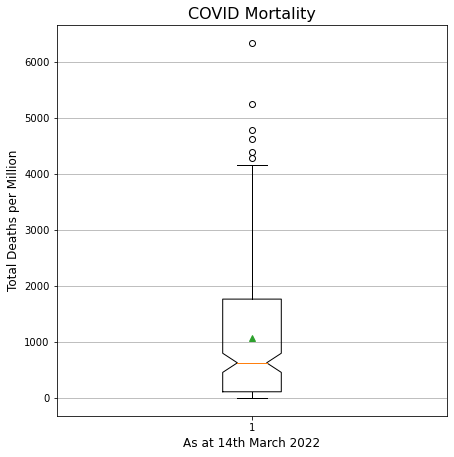

In [ ]:
# INSERT YOUR CODE HERE
#
# 5. Write your code to construct a box plot for the COVID mortality total_deaths_per_million.
#
fig, ax = plt.subplots(figsize=(7,8))
box_plot = ax.boxplot(data_filtered_by_date['total_deaths_per_million'],
                     notch=True, showmeans=True)
ax.yaxis.grid(True)
ax.set_title('COVID Mortality', fontsize=16)
ax.set_ylabel('Total Deaths per Million', fontsize=12)
ax.set_xlabel('As at 14th March 2022', fontsize=12)
ax.set_box_aspect(1)


In [ ]:
# INSERT YOUR COMMENT HERE
#
# 6. Briefly describe the meaning of the difference between the mean and median COVID mortality per million.
# Explain in detail, why are they different? (2 marks)
#    
#       ~ Comment below ~

### <span style="color:#4189b0">2.6 - Comment</span>
<span style="color:#4189b0">The large difference between the **mean** and **median** of COVID mortality per million sugests that the data is skewed and is not normally distributed.

<span style="color:#4189b0">Examining the boxplot above, we can see that the upper whisker representing 25% of the data incorporates a greater range than the first three quartiles combined. Compounded by the few outliers beyond the upper whisker, the mean is pulled away from the median heavily skewing the data. The countries represented by this 4th quartile have mortality rates many times greater than the median and should be examined more closley to determine what they may have in common.   


---
## **Instruction 3**
This part of the assignment is designed to examine COVID cases and mortality data for different countries. The countries are given by their ISO alpha-3 codes, given here: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3 .
As in the previous task, we will be using **total_cases_per_million** and **total_deaths_per_million** columns.

**Your tasks**:

1. Write your code to find and print out the number of countries in the dataset. (**1 mark**)
2. Population mortality is measured in the number of deaths per the number of people. The population mortality from seasonal influenza is generally thought to be about 0.01% (1 death per 10000 people). Write your code to find and print out the list of countries with the population mortality greater than ten times of the population mortality of seasonal influenza. (**2 marks**)
3. Write your code to find and print out the country with the highest population mortality. Both the country code and the mortality value for this country need to be printed out (**2 marks**)
4. Write your code to construct a dictionary variable ***data_large_countries*** whose keys are **iso_code**, **total_cases_per_million**, **total_deaths_per_million**, **population**, **population_density**. You can start from the original dataset **data_dict** and adapt the code given to you in Instruction 2 (Task 1). Alternatively, you can use **data_filtered_by_date** and then filter the countries by population. Print the generated dictionary. (**2 marks**)
5. Using the new dictionary ***data_large_countries***, plot a bar chart of mortality sorted in descending order of values for the countries with **population** more than 1 million, achieving first twenty places of leadership in exterminating their own population using COVID. (**3 marks**)
6. Using the same dictionary, plot a bar chart of total cases and population density for the mortality leaders. Use the same order of countries as in Task 5. (**3 marks**)
7. Discuss the bar charts. Which conclusion can you draw, if you look at all of them together? Try to support your conclusions with Pearson correlation coefficients. (**2 marks**)

[**Total mark: 15**]

In [ ]:
# INSERT YOUR CODE HERE 
# 1. Write your code to find and print out the number of countries in the dataset. (1 mark)
# To be sure that you get a list of unique countries, you may want to use np.unique
#

unique_values = np.unique(data_dict['iso_code'])
num_countries = np.count_nonzero(unique_values)
print(Fore.BLUE + 'The number of \"countries\" (based on iso_code) is: ', num_countries)

# Double checking the country count from the iso_codes against the loacation attributes...
unique_values2 = np.unique(data_dict['location'])
num_countries2 = np.count_nonzero(unique_values2)
print(Fore.GREEN + 'The number of \"countries\" (based on location) is: ', num_countries2)

#print(unique_values)
# After printing the unique_values, I realise that not all iso_codes relate to countries!! A sneaky trap. 
unique_values = np.unique(data_dict['iso_code'], return_index=True)
country_index = np.array([])

for key, value in zip(unique_values[0], unique_values[1]):
    if 'OWID_' in key:
        continue
    else:
        country_index = np.append(country_index, value)

actual_num_countries = len(country_index)
print()
print(Fore.BLUE + 'But neither of the above counts are correct...')
print(Fore.GREEN + 'The ACTUAL number of countries in the data set is:', actual_num_countries, Fore.BLACK)
country_index = country_index.astype(int)
#print(data_dict['location'][country_index]) # Please uncomment to see full list of countries if required.

The number of "countries" (based on iso_code) is:  238
The number of "countries" (based on location) is:  238

But neither of the above counts are correct...
The ACTUAL number of countries in the data set is: 223 


In [ ]:
# INSERT YOUR CODE HERE 
#
# 2. Population mortality from seasonal influenza is generally thought to be about 0.01% 
# (1 death per 10000 people). Write your code to find and print out the list of countries 
# with the population mortality is more than ten times of the population mortality of 
# the seasonal influenza. (2 marks)
#

# 0.01% => 0.0001, 10 times that value = 0.001 => 0.1%
min_required_value = (0.001*1000000)

index_of_target_mortality = (data_dict['total_deaths_per_million'] >= min_required_value)
data_filtered_by_mortality_rate = {}
    
for key in data_dict.keys():
    try:
        data_filtered_by_mortality_rate[key] = np.float_(data_dict[key][index_of_target_mortality])
    except:
        data_filtered_by_mortality_rate[key] = data_dict[key][index_of_target_mortality]

target_iso_codes = np.unique(data_filtered_by_mortality_rate['iso_code'], return_index=True)

#Filtering out non-country values
target_country_index = np.array([]) 
for key, value in zip(target_iso_codes[0], target_iso_codes[1]):
    if 'OWID_' in key:
        continue
    else:
        target_country_index = np.append(target_country_index, value)

#Converting array to type int
target_country_index = target_country_index.astype(int)

num_of_countries = len(target_country_index)
percent_against_all_countries = "{:.2f}".format(num_of_countries/actual_num_countries*100)

print(Fore.BLUE + 'The total number of countries with a mortality rate equal to or above 0.1%:', num_of_countries)
print(Fore.GREEN + 'Those countries represent', percent_against_all_countries, 
      '% of all countries in the data set and are listed below:' + Fore.BLACK)
print(data_filtered_by_mortality_rate['location'][target_country_index])


The total number of countries with a mortality rate equal to or above 0.1%: 86
Those countries represent 38.57 % of all countries in the data set and are listed below:
['Aruba' 'Albania' 'Andorra' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Austria' 'Belgium' 'Bonaire Sint Eustatius and Saba' 'Bulgaria'
 'Bahamas' 'Bosnia and Herzegovina' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Botswana' 'Switzerland' 'Chile' 'Colombia' 'Costa Rica'
 'Curacao' 'Cyprus' 'Czechia' 'Germany' 'Ecuador' 'Spain' 'Estonia'
 'France' 'United Kingdom' 'Georgia' 'Gibraltar' 'Greece' 'Grenada'
 'Guyana' 'Honduras' 'Croatia' 'Hungary' 'Ireland' 'Iran' 'Israel' 'Italy'
 'Jordan' 'Kazakhstan' 'Lebanon' 'Saint Lucia' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Latvia' 'Monaco' 'Moldova' 'Mexico' 'North Macedonia'
 'Malta' 'Montenegro' 'Malaysia' 'Namibia' 'New Caledonia' 'Netherlands'
 'Panama' 'Peru' 'Poland' 'Portugal' 'Paraguay' 'Palestine'
 'French Polynesia' 'Romania' 'Russia' 'San Marino' 'Serbia' '

In [ ]:
# INSERT YOUR CODE HERE 
# 3. Write your code to find and print out the country with the highest population mortality. 
# Both the country code and the mortality value for this country need to be printed out (2 marks)
# HINT: You can use np.where or np.argmax functions - please check what these functions are for.
#

# Note* The code below uses the dictionary created in exercise 3.2(above), please run that cell first.
index_of_highest_mortality = np.argmax(data_filtered_by_mortality_rate['total_deaths_per_million'])

print(Fore.BLUE + 'The country with the highest population mortality:', Fore.GREEN +
      data_filtered_by_mortality_rate['iso_code'][index_of_highest_mortality]+':',
      data_filtered_by_mortality_rate['location'][index_of_highest_mortality]+' =',
      "{:,.2f}".format(data_filtered_by_mortality_rate['total_deaths_per_million'][index_of_highest_mortality]),
      'per million.')


The country with the highest population mortality: PER: Peru = 6,358.86 per million.


In [ ]:
# INSERT YOUR CODE HERE 
# 4. Write your code to construct a dictionary variable ***data_large_countries*** whose keys are **iso_code**,
# **total_cases_per_million**, **total_deaths_per_million**, **population**, **population_density**.
# You can start from the original dataset **data_dict** and adapt the code given to you in Instruction 2 (Task 1). 
# Alternatively, you can use **data_filtered_by_date** and then filter the countries by population. Print the 
# generated dictionary.
# (**2 marks**)
index_of_pop_over_1mill = (data_filtered_by_date['population'] > 1000000)

select_keys = ('iso_code', 'total_cases_per_million', 'total_deaths_per_million', 
               'population', 'population_density')
data_large_countries = {}

for key in select_keys:
    try:
        data_large_countries[key] = np.float_(data_filtered_by_date[key][index_of_pop_over_1mill])
    except:
        data_large_countries[key] = data_filtered_by_date[key][index_of_pop_over_1mill]     

num_of_records = len(data_large_countries['iso_code'])
print(Fore.BLUE + 'The total number of records in data_large_countries are', num_of_records, Fore.GREEN)
print(data_large_countries.keys(), Fore.BLACK)
print(data_large_countries) # Please uncomment to see full dictionary.


The total number of records in data_large_countries are 169 
dict_keys(['iso_code', 'total_cases_per_million', 'total_deaths_per_million', 'population', 'population_density']) 
{'iso_code': array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'OWID_ASI',
       'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BLR', 'BEL', 'BEN', 'BOL',
       'BIH', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CZE', 'COD', 'DNK', 'DJI', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FIN',
       'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GTM', 'GIN',
       'GNB', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'IND', 'IDN', 'IRN',
       'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN',
       'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY',
       'LTU', 'OWID_LIC', 'OWID_LMC', 'MDG', 'MWI', 'MYS', 'MLI', 'MRT',
       'MUS', 'MEX', 

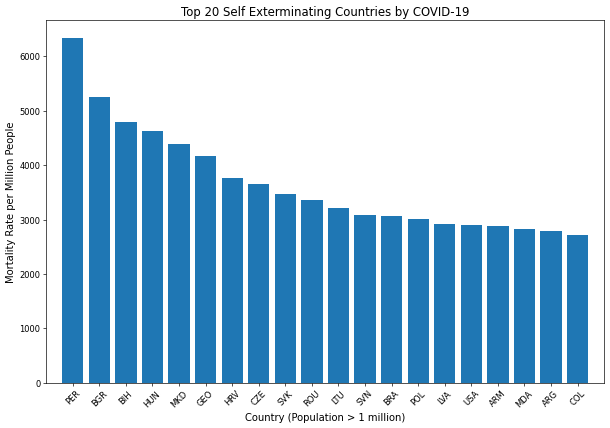

In [ ]:
# INSERT YOUR CODE HERE 
# 5. Using the new dictionary ***data_large_countries***, plot a bar chart of mortality
# sorted in descending order of values for the countries with **population** more than 1 million, 
# achieving first twenty places in exterminating their own population using COVID. (**3 marks**)
#
# HINT: You can use np.argsort.

index_of_mortality_ascend = np.argsort(data_large_countries['total_deaths_per_million'])
index_of_mortality_descend = index_of_mortality_ascend[::-1] # Reverses the array

# Captureing the top 20's and removing the OWID_ groups for this and the following plot.  
population20 = np.array([])
pop_density20 = np.array([])
mort_rate20 = np.array([])
total_cases20 = np.array([])
iso_code20 = np.array([])

for key, value in zip(data_large_countries['iso_code'][index_of_mortality_descend], index_of_mortality_descend):
    if "OWID_" in key:
        continue
    else:  
        if len(population20)  < 20: 
            population20 = np.append(population20, data_large_countries['population'][value])
            iso_code20 = np.append(iso_code20, data_large_countries['iso_code'][value])
            mort_rate20 = np.append(mort_rate20, data_large_countries['total_deaths_per_million'][value])
            pop_density20 = np.append(pop_density20, data_large_countries['population_density'][value])
            total_cases20 = np.append(total_cases20, data_large_countries['total_cases_per_million'][value])

x_pos = np.arange(len(population20))  

fig, ax = plt.subplots(figsize=(12,8), dpi=60)
ax.bar(x_pos, mort_rate20, align='center')
ax.set_title("Top 20 Self Exterminating Countries by COVID-19", size='14')
ax.set_xlabel("Country (Population > 1 million)", size='12')
ax.set_ylabel("Mortality Rate per Million People", size='12')
ax.set_xticks(x_pos)
ax.set_xticklabels(iso_code20, rotation=45)
ax.set_xlim(-1, len(mort_rate20))
fig.savefig('top_20_mortality.pdf', format='PDF', dpi=60)
plt.show()


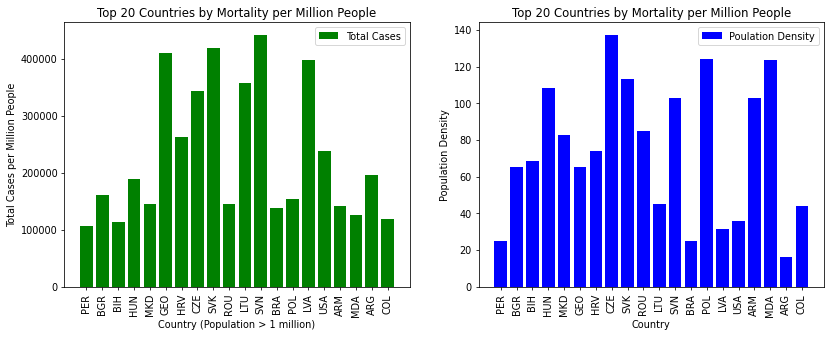

In [ ]:
# INSERT YOUR CODE HERE 
# 6. Using the same dictionary, plot a bar chart of total cases and population density for the mortality leaders.
# Use the same order of countries as in Task 5. (**3 marks**)
#
# HINT: you want to plot these bar charts side by side (two separate plots side by side for easy comparison).

labels = iso_code20
width = 0.8
x_pos = np.arange(len(labels))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), dpi=70)

ax[0].bar(x_pos, total_cases20, width=width, align='center', label='Total Cases', color='g')
ax[1].bar(x_pos, pop_density20, width=width, align='center', label='Poulation Density', color='b')

ax[0].set_xlabel("Country (Population > 1 million)")
ax[0].set_ylabel("Total Cases per Million People")
ax[0].set_title("Top 20 Countries by Mortality per Million People")
ax[1].set_xlabel("Country")
ax[1].set_ylabel("Population Density")
ax[1].set_title("Top 20 Countries by Mortality per Million People")

ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(labels, rotation=90)
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(labels, rotation=90)

ax[0].legend(loc=0)
ax[1].legend()

plt.show()

In [ ]:
# 7. Discuss the bar charts. Which conclusion can you draw, if you look at all of them together? 
# Try to support your conclusions with Pearson correlation coefficients. (**2 marks**)
# INSERT YOUR COMMENT HERE
#
# INSERT YOUR CODE HERE
#
pearson_r = np.cov(total_cases20, pop_density20)[0, 1] / (np.std(total_cases20) * np.std(pop_density20))
print(Fore.BLUE + 'Pearsons Correlation Coefficiant: ' + "{:.3f}".format(pearson_r))

Pearsons Correlation Coefficiant: 0.127


### <span style="color:#4189b0">3.7 - Comment</span>
<span style="color:#4189b0">At first glance there seems to be a similar shape between the two plots, however, upon closer inspection, there doesn't seem to be any significant correlation. Here and there the two variables line up but without consistency. 

<span style="color:#4189b0">Further exploring the potential correlation, I calculated the Pearson r which equated to 0.127. Virtually no correlation. Lastly, I thought I'd plot a scatter plot (below: "Total Cases V Population Density") for a visual representation to see if any pattern emerged. The plot shows an even spread with no trend emerging. Clearly, the Pearson r is not miss leading and there is no correlation between population density and the total number of COVID-19 cases.

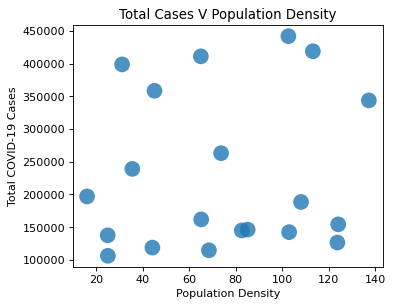

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
ax.scatter(pop_density20, total_cases20, alpha=0.8, edgecolor='none', s=200)
ax.set_xlabel('Population Density')
ax.set_ylabel('Total COVID-19 Cases')
ax.set_title("Total Cases V Population Density")
plt.show()

---
## **Instruction 4**
Let's now look at the other end of the COVID spread - at the countries with large populations (more than 1 million) and with the minimal number of cases and deaths. We can use the same dataset ***data_large_countries*** we have prepared in the previous task.

**Your tasks here are:**
1. Using the new dictionary ***data_large_countries***, plot bar charts of mortality per million, cases per million and population density for the 20 countries with **population** more than 1 million and minimal mortality. (**3 marks**)
2. In the bar charts you have got you should see one or two very clear exceptions. Describe their properties. What makes them exceptional? (**2 marks**)

[**Total mark: 5**]

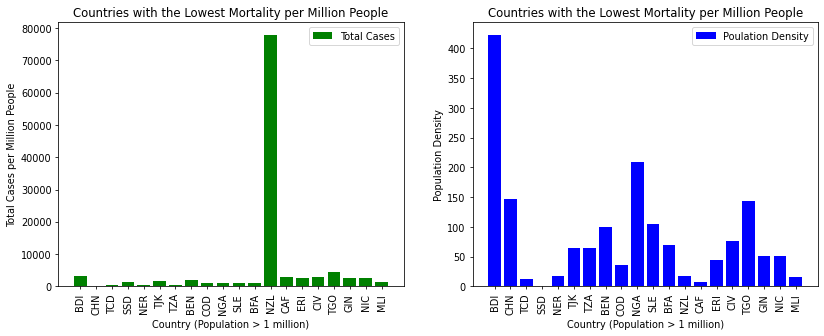

In [ ]:
# 1. Using the new dictionary ***data_large_countries***, plot bar charts of mortality per million, 
# cases per million and population density for the 20 countries with **population** more than 1 
# million and minimal mortality. (**3 marks**)
#INSERT YOUR CODE HERE
#

index_of_mort_ascending = np.argsort(data_large_countries['total_deaths_per_million'])
tot_cases_low_mort = np.array([])
pop_dens_low_mort = np.array([])
iso_code_low_mort = np.array([])

for key, value in zip(data_large_countries['iso_code'][index_of_mort_ascending], index_of_mort_ascending):
    if "OWID_" in key:
        continue
    else:  
        if len(tot_cases_low_mort) < 20:
            tot_cases_low_mort = np.append(tot_cases_low_mort, data_large_countries['total_cases_per_million'][value])
            pop_dens_low_mort = np.append(pop_dens_low_mort, data_large_countries['population_density'][value])
            iso_code_low_mort = np.append(iso_code_low_mort, data_large_countries['iso_code'][value])

labels = iso_code_low_mort
width = 0.8
x_pos = np.arange(len(labels))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), dpi=70)

ax[0].bar(x_pos, tot_cases_low_mort, width=width, align='center', label='Total Cases', color='g')
ax[1].bar(x_pos, pop_dens_low_mort, width=width, align='center', label='Poulation Density', color='b')

ax[0].set_xlabel("Country (Population > 1 million)")
ax[0].set_ylabel("Total Cases per Million People")
ax[0].set_title("Countries with the Lowest Mortality per Million People")
ax[1].set_xlabel("Country (Population > 1 million)")
ax[1].set_ylabel("Population Density")
ax[1].set_title("Countries with the Lowest Mortality per Million People")

ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(labels, rotation=90)
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(labels, rotation=90)

ax[0].legend(loc=0)
ax[1].legend()

plt.show()


In [ ]:
# 2. In the bar charts you have got you should see one or two very clear exceptions. 
# Describe their properties. What makes them exceptional? (**2 marks**)
# INSERT YOUR COMMENT HERE
#
#    ~ Comment Below ~

### <span style="color:#4189b0">4.2 - Comment</span>
<span style="color:#4189b0">Examining the two bar charts above, firstly total cases per million, we see NZL (New Zealand) with total cases per million around seven times that of its low mortality counterparts. I assume that New Zealand made it into this group despite its number of cases because it has an advanced health care system. Possibly other countries are just lucky to have kept their number of cases low. However, if they lack advanced health care, they may also lack reliable reporting.
    
<span style="color:#4189b0">Turning my attention to the population density bar chart we have a few standouts, four to be exact. Looking up the iso-codes I see the top three densest populated countries happen to be all African and the fourth is China. This immediately raises suspicions and gives credit to my earlier suspicion about the potential lack of reliable reporting. There has been a lot in the media about China fudging the numbers, we also know that Africa has many developing countries and doesn't have the infrastructure for reliable monitoring and reporting. 
    
<span style="color:#4189b0">Based on the highest twenty mortality rates plotted earlier. We concluded that there is no correlation between population density and total cases, possibly, that conclusion has been pre-maturely reached. It would be worth re-examining the relationship between population density and total cases of all the nations that are known for high reporting standards. In the meantime, caution should be used when drawing any conclusion from these two plots as the lack of numbers may just represent a lack of reporting.

---
## **Instruction 5 (D/HD level)**

We will return back to the differences between the countries in their ways of dealinig with epidemics in Instruction 6. Now, however, we shall look at the basics of epidemiological processes from the point of view
of real data. Generally, epidemics evolve exponentially until they are either stopped by some measures (lockdowns, vaccinations) or saturate (population dies out and/or gets naturally immune).

**Your tasks**:

1. Define a function called **convert_date** that takes date string (in the format as it is given in the dataset csv file) as the input and returns the number of days from that date until now. The number should be negative. For example, today is 14/3/22. The input date is 3/3/22. The function should compute the difference between the input date and today's date and return -11. If the function argument is in incorrect form, the function should return 0. Don't forget to test it. (**2 marks**)
2. Pick three countries, which may be interesting or relevant for you. For me they are the UK, Ukraine and Australia (iso codes GBR, UKR, AUS). For demonstration purpose you want to include Australia or another country, which was able to deal with the COVID epidemics more or less successfully, and a country with large number of cases. Make a new list **country_list**, which contains iso codes of the countries. (**1 mark**)
3. Plot how **total_cases** for the countries you have picked, grow in time. All three curves have to be on the same plot with the horizontal axis of "Number of days before today". Don't forget the legend. (**2 marks**)
4. If you have chosen the countries appropriately, you will see that the plot you have produced is not very informative. Why is it so? How many waves do you see for Australia? What can you do to make it more informative and to reveal the true dynamics? Note there are **two** reasons, you need to provide both. (**1 mark**)
5. Implement the idea from Task 4 and make a plot, similar to task 3. (**2 marks**)
6. Explain what you see in the new plot. Do you see specific regions of interest in the epidemic curves? Discuss them. How many waves do you see now? (**2 marks**)
7. There are many more interesting dependencies you can produce in this part, and you are welcome to do so. Also, if you implement everything correctly, you don't need to limit yourself to three countries only. To score full mark in this task, you need to provide a **detailed** comparative analysis of epidemic growth (cases and mortality) for two countries, which are similar by their population, but different by their vaccination rates. (**5 marks**)

[**Total mark: 15**]



In [ ]:
# 1. Define a function called **convert_date** that takes date string (in the format as it is given 
# in the dataset csv file) as the input and returns the number of days from that date until now. The 
# number should be negative. For example, today is 14/3/22. The input date is 3/3/22. The function 
# should return -11. If the function argument is in incorrect form, the function should return 0. 
# (**2 marks**)
#    
# Hint: you might want to use datetime package.
#
# INSERT YOUR CODE HERE

import datetime

def convert_date(date:str):
    today = datetime.datetime.today()
    str_format = "%Y-%m-%d"
    date = datetime.datetime.strptime(date,str_format)
    result = date - today
    return result.days

print(convert_date('2021-04-13'))


-405


In [ ]:
# 2. Pick three countries, which may be interesting or relevant for you. For me they are the UK, 
# Ukraine and Australia (iso codes GBR, UKR, AUS). For demonstration purpose you want to include 
# Australia or another country, which was able to deal with the COVID epidemics more or less 
# successfully, and a country with large number of cases. Make a new list **country_list**, which 
# contains iso codes of the countries. (**1 mark**)
#
# INSERT YOUR CODE HERE

country_list = []
unique_values = np.unique(data_dict['location'], return_index=True)

for key, value in zip(unique_values[0], unique_values[1]):
    if key == 'Australia' or key == 'Germany' or key == 'Peru':
        country_list.append(data_dict['iso_code'][value])

print(country_list)

['AUS', 'DEU', 'PER']


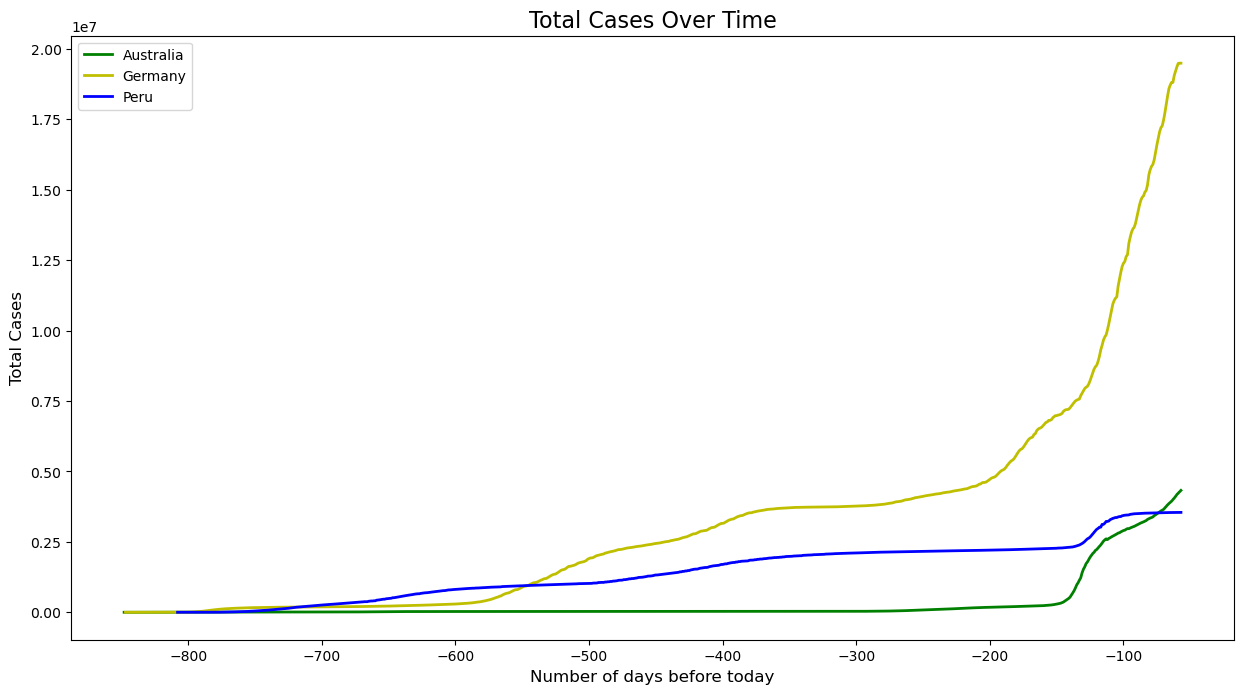

In [ ]:
# 3. Plot how **total_cases** for the countries you have picked, grow in time. All three curves 
# have to be on the same plot with the horizontal axis of "Number of days before today". Don't 
# forget the legend. (**2 marks**)
#
# INSERT YOUR CODE HERE

aust_index = (data_dict['location'] == 'Australia')
deu_index = (data_dict['location'] == 'Germany')
peru_index = (data_dict['location'] == 'Peru')

aust_days = np.array([])
deu_days = np.array([])
peru_days = np.array([])

for key, value in zip(data_dict['total_cases'][aust_index], data_dict['date'][aust_index]):
    aust_days = np.append(aust_days, convert_date(value))
    
for key, value in zip(data_dict['total_cases'][deu_index], data_dict['date'][deu_index]):
    deu_days = np.append(deu_days, convert_date(value))
    
for key, value in zip(data_dict['total_cases'][peru_index], data_dict['date'][peru_index]):
    peru_days = np.append(peru_days, convert_date(value))
            
fig, ax = plt.subplots(figsize=(15, 8), dpi=100)
ax.plot(aust_days, data_dict['total_cases'][aust_index], 'g', label='Australia', lw=2)
ax.plot(deu_days, data_dict['total_cases'][deu_index], 'y', label='Germany', lw=2)
ax.plot(peru_days, data_dict['total_cases'][peru_index], 'b', label='Peru', lw=2)

ax.set_title('Total Cases Over Time', fontsize=16)
ax.set_xlabel('Number of days before today', fontsize=12)
ax.set_ylabel('Total Cases', fontsize=12)

ax.legend(loc=2)
plt.show()


In [ ]:
# 4. If you have chosen the countries appropriately, you will see that the plot you have produced 
# is not very informative. Why is it so? How many waves do you see for Australia? What can you do 
# to make it more informative and to reveal the true dynamics? Note there are **two** reasons, you 
# need to provide both. (**1 mark**)
#
# ~ Comment Below ~

### <span style="color:#4189b0">5.4 - Comment</span>
<span style="color:#4189b0">Looking at the plot above I see small reductions in the upward trend but no dips. I see a small wave for Australia. It took me some time to understand what's happening here, but I believe it's due to the fact that the total cases are a cumulative figure and as such don't show decreases in the daily rate. 

<span style="color:#4189b0">On closer inspection (and after a little reading), I can glean a little more information. The concave up sections are the actual increases in the daily cases, the linear constant sections show a stable rate of change and the concave down sections are where the daily rates actually decrease. That said, it is hard to identify how each of the countries fair compared to one another. Why? 
    
<span style="color:#4189b0">At first I thought the reason it's so hard to see the concaves, up and down, is due to Germany having such a higher cumulative total. Potentially compressing the other two plots to the point that the changes aren't very recognisable. However, after seperating these out there was no real change. 
    
<span style="color:#4189b0">Now, after trying many variations, I think it's as simple as country populations not being scaled. It may be better to switch to a total case per million variable so the values are scaled rather than just the cumulative total cases. 

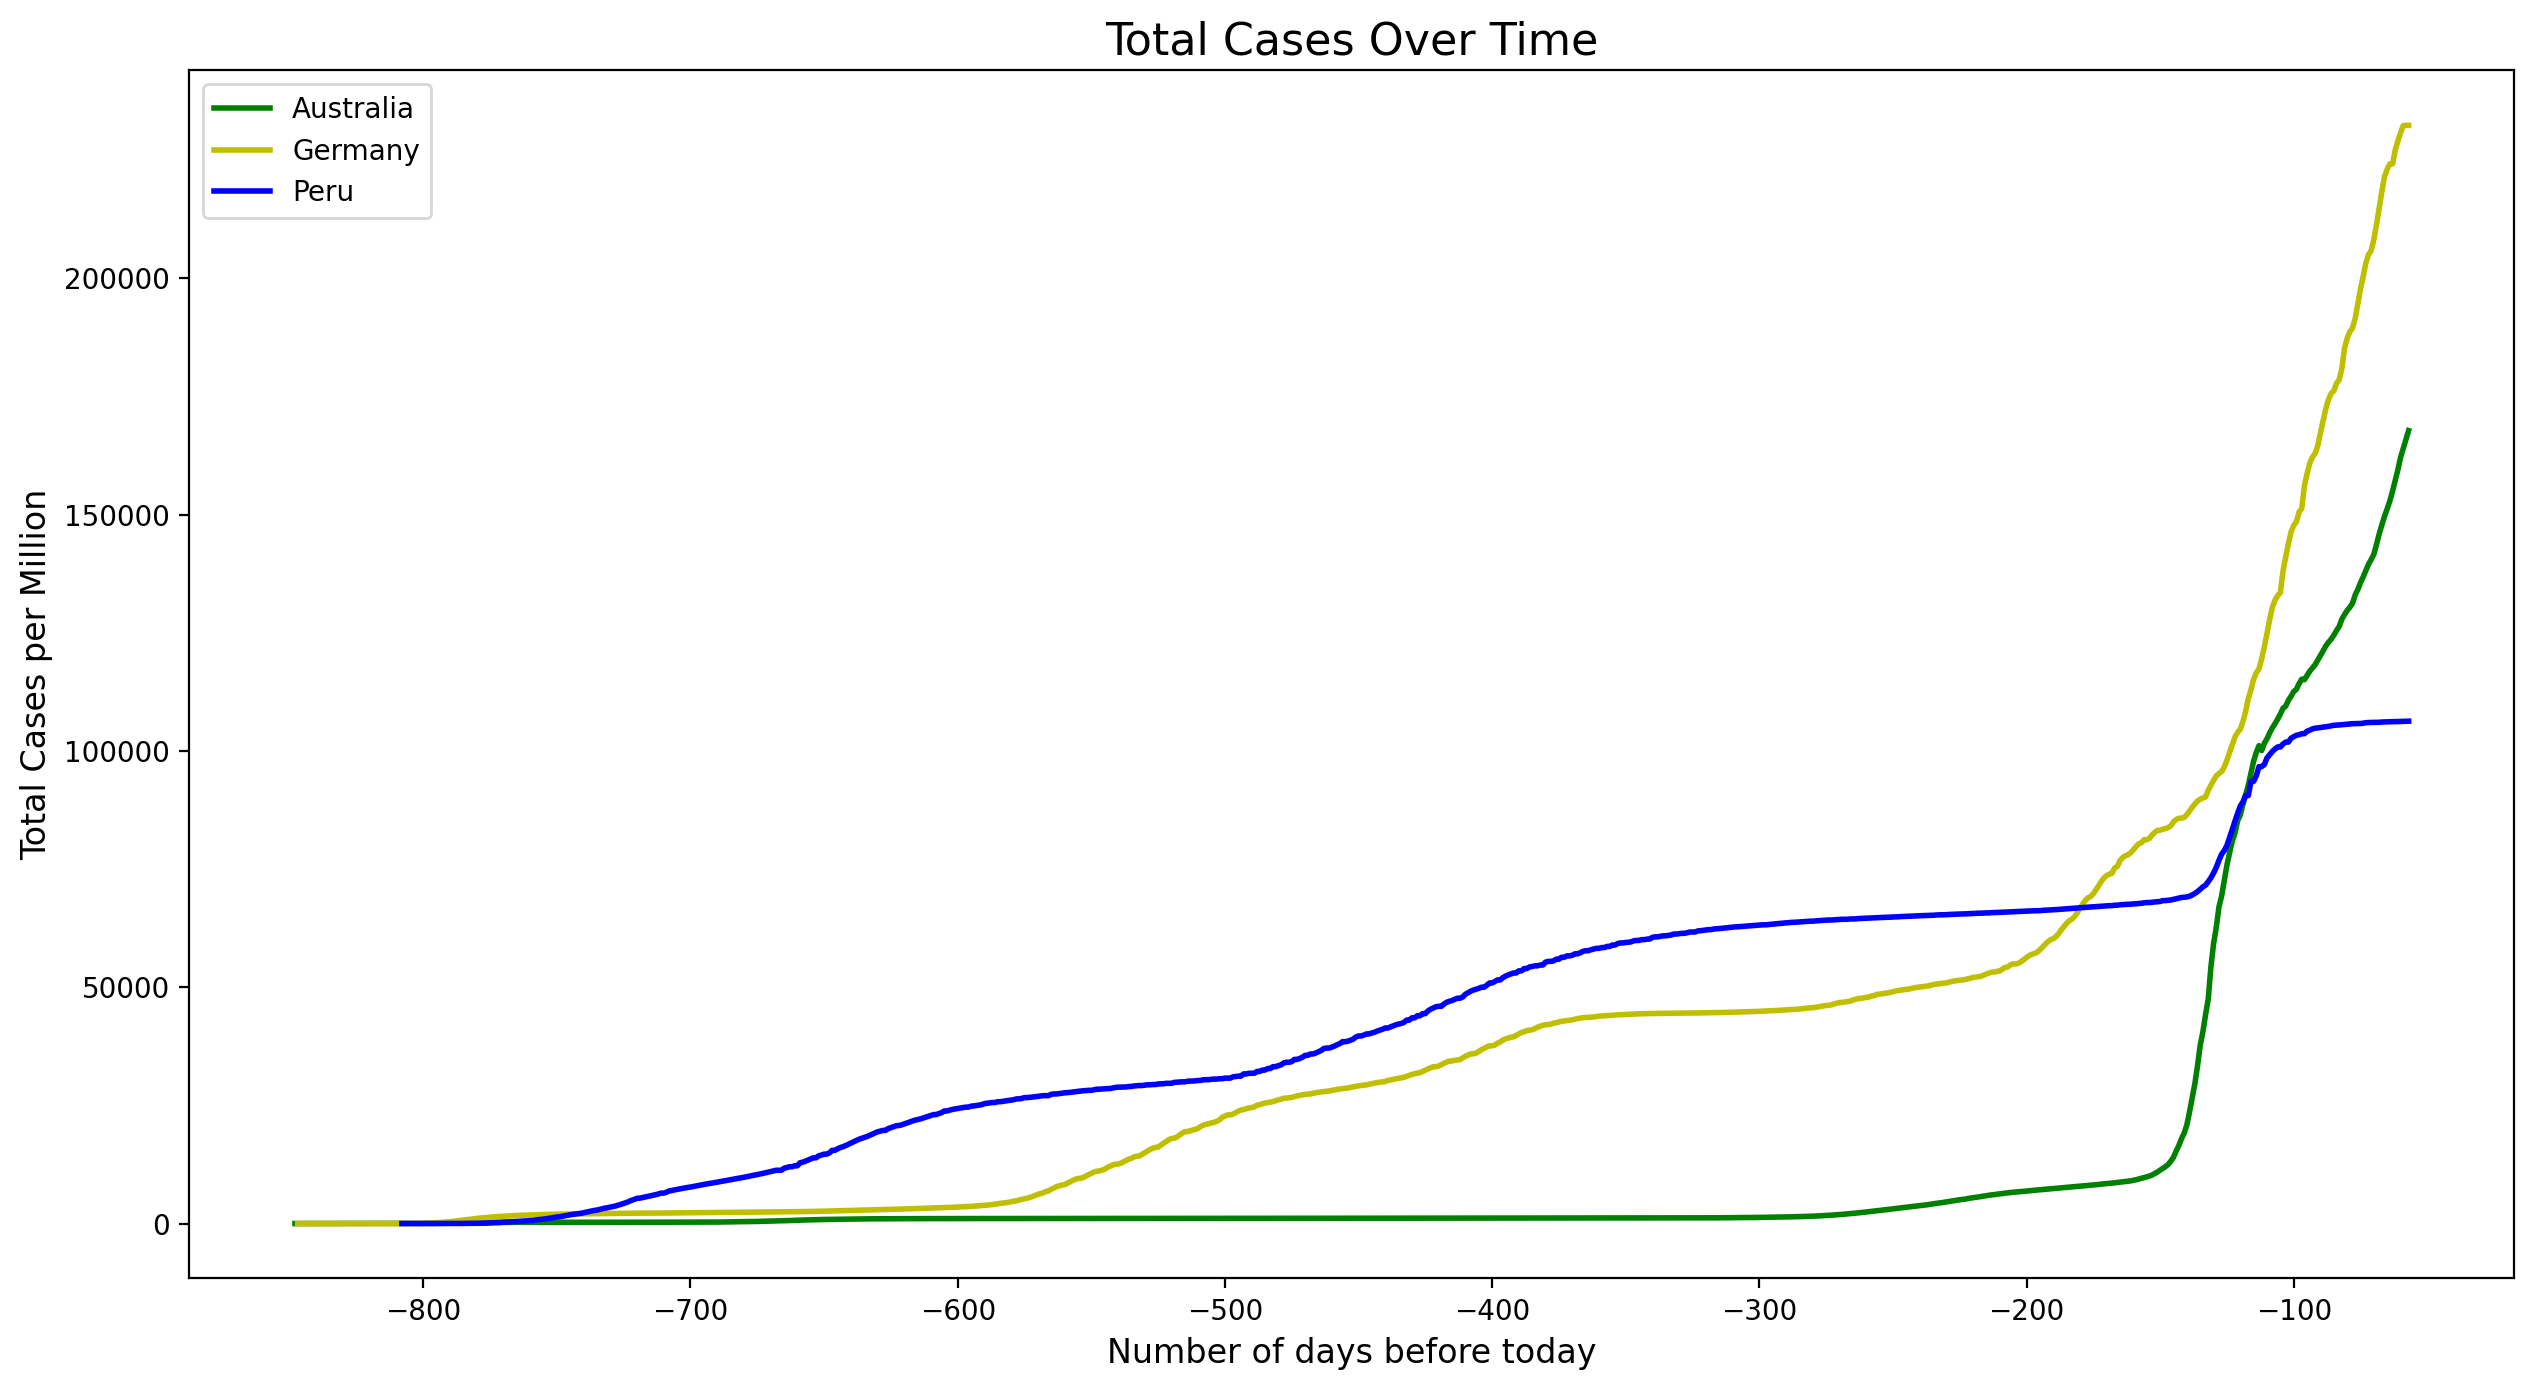

In [ ]:
# 5. Implement the idea from Task 4 and make a plot, similar to task 3. (**2 marks**)
#
# INSERT YOUR CODE HERE

aust_index = (data_dict['location'] == 'Australia')
deu_index = (data_dict['location'] == 'Germany')
peru_index = (data_dict['location'] == 'Peru')

aust_days = np.array([])
deu_days = np.array([])
peru_days = np.array([])

for key, value in zip(data_dict['total_cases_per_million'][aust_index], data_dict['date'][aust_index]):
    aust_days = np.append(aust_days, convert_date(value))
    
for key, value in zip(data_dict['total_cases_per_million'][deu_index], data_dict['date'][deu_index]):
    deu_days = np.append(deu_days, convert_date(value))
    
for key, value in zip(data_dict['total_cases_per_million'][peru_index], data_dict['date'][peru_index]):
    peru_days = np.append(peru_days, convert_date(value))
            
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8), dpi=200)
ax.plot(aust_days, data_dict['total_cases_per_million'][aust_index], 'g', label='Australia', lw=2)
ax.plot(deu_days, data_dict['total_cases_per_million'][deu_index], 'y', label='Germany', lw=2)
ax.plot(peru_days, data_dict['total_cases_per_million'][peru_index], 'b', label='Peru', lw=2)

ax.set_title('Total Cases Over Time', fontsize=16)
ax.set_ylabel('Total Cases per Million', fontsize=12)
ax.set_xlabel('Number of days before today', fontsize=12)

ax.legend(loc=2)
plt.show()

In [ ]:
# 6. Explain what you see in the new plot. Do you see specific regions of interest in the epidemic curves? 
#Discuss them. 
# How many waves do you see now? (**2 marks**)
#
# INSERT YOUR COMMENT HERE
#
#    ~ Comment Below ~ 

### <span style="color:#4189b0">5.6 - Comment</span>
<span style="color:#4189b0">Looking at the plot now I have switched out the **total_cases** for the **total_cases_per_million** variable it's much more telling of how the countries compare to one another. The first thing I notice is that Peru's final number of cases is less than Australia's. Yet they have the highest mortality rate per million. Possibly their cases peaked earlier or maybe, it's easier to report on mortality as it's impossible to ignore.  

<span style="color:#4189b0">Both Germany and Peru have distinct waves, three for Peru with the worst of them around 100 days ago. Germany has more waves, at least four but they are more subtle than Peru's suggesting that the severity wasn't as bad. The worst of which was again around 100 days ago. 

<span style="color:#4189b0">Australia in contrast is reasonably flat with the first small wave starting around 220 days ago. Then, in line with the other countries, we had another spike around the 100-day mark, followed by a little easing before another spike in new cases. The big question is what happened around 100 days ago?  

<span style="color:#4189b0">A quick google search and my best guess is the emergence of the omicron variant which has seen spikes in cases around the world. 

Pearsons Correlation Coefficiant: -0.020


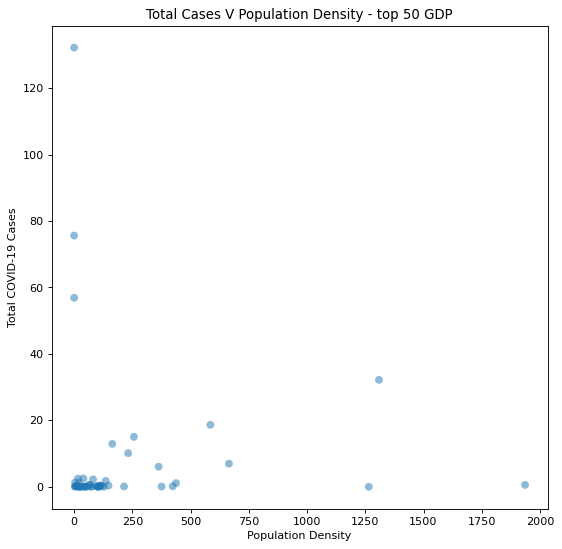

In [ ]:
# 7. There are many more interesting dependencies you can produce in this part, and you are welcome to do so. 
# Also, if you implement everything correctly, you don't need to limit yourself to three countries only. To 
# score full mark in this task, you need to provide a **detailed** comparative analysis of epidemic growth 
# (cases and mortality) for two countries, which are similar by their population, but different by their 
# vaccination rates. (**5 marks**)
#
# INSERT YOUR CODE HERE
#
# INSERT YOUR COMMENT HERE
#
# Going back to explore the relationship between population density and total cases. 
# Intuitivley you would expext these to have a relationship. 

target_iso_codes = np.unique(data_dict['iso_code'], return_index=True)
ascend_gdp_index = np.argsort(data_dict['gdp_per_capita'][target_iso_codes[1]])
Descend_gdp_index = ascend_gdp_index[::-1]


tot_cases_high_gdp = np.array([])
pop_dens_high_gdp = np.array([])
iso_code_high_gdp = np.array([])

for key, value in zip(target_iso_codes[0], target_iso_codes[1]):
    if 'OWID_' in key:
        continue
    else:  
        if len(tot_cases_high_gdp) < 50:
            tot_cases_high_gdp = np.append(tot_cases_high_gdp, data_dict['total_cases_per_million'][value])
            pop_dens_high_gdp = np.append(pop_dens_high_gdp, data_dict['population_density'][value])
            iso_code_high_gdp = np.append(iso_code_high_gdp, data_dict['iso_code'][value])

pearson_r = np.cov(tot_cases_high_gdp, pop_dens_high_gdp)[0, 1] / (np.std(tot_cases_high_gdp) * np.std(pop_dens_high_gdp))
print(Fore.BLUE + 'Pearsons Correlation Coefficiant: ' + "{:.3f}".format(pearson_r))
                    
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.scatter(pop_dens_high_gdp, tot_cases_high_gdp, alpha=0.5, edgecolor='none', s=50)
ax.set_xlabel('Population Density')
ax.set_ylabel('Total COVID-19 Cases')
ax.set_title("Total Cases V Population Density - top 50 GDP")
plt.show()

### <span style="color:#4189b0">5.7 - Comment</span>
<span style="color:#4189b0">Well, it looks as though my suspicion of a relationship between population density and total cases has been shot down in flames. With a Pearson corelation of -0.020 and a plot liek the one above it's safe to say there is no relationship there. 

<span style="color:#4189b0">Interestingly, the highest GDP countries had such low covid cases, if I had more time I would look into that further. It makes sense intuitivley that they can pay their citizens to stay home but based on my previous intuition I'll wait and check that out before making any bold claims. ;)

---
## **Instruction 6** (D/HD level)
In this part of the assignment, we go back to the current state of affairs with COVID and look deeper into the dependencies between the parameters of the COVID epidemic and population parameters. We get back to the dataset we have created, namely **data_filtered_by_date**. This dataset also contains population parameters, for example, population and population density, median age, GDP per capita, human development index, and so on.

NOTE: If you are curious, you may want to limit the number of countries you plot by some condition (similar to what we did above by limiting countries to ones with population above 1 million. The mark will not be affected if you don't.

You will need to carefully get rid of all Python warnings in this section to score the full mark.

1. First of all, let's confirm what we saw before in Instructions 3 and 4, namely, counterintuitvely weak or no dependence of the number of cases and mortality on average population density. You need to plot two scatter plots of total mortality and total case numbers per million on population density. Take logarithm base 10 of the population density. (**1 mark**)
2. Annotate the scatter plots with the iso codes of countries. (**1 mark**)
3. Make scatter plots of the mortality and case numbers on GDP per capita and annotate them with the iso codes of countries. (**1 mark**)
4. Discuss what you see in these scatter plots. Strange, isn't it? What do you think are the reasons? There can be many. (**2 marks**)
5. Make and annotate scatter plot of median age vs mortality and meadian age vs log10 of gdp per capita. Would log10 make the plot clearer? (**1 mark**)
6. Use numpy **polyfit** or **polynomial** function to fit a straight line in the last scatter plot (median age vs gdp per capita). Overplot the line. Note - IT CAN BE HARD! (**2 marks**)
7. Discuss the scatter plots. (**2 marks**)
8. Find another interesting dependence in the data using other variables (for example, use vaccination information), plot, analyse and discuss it. (**5 marks**)

[**Total mark: 15**]

In [ ]:
# 1. First of all, let's confirm what we saw before in Instructions 3 and 4, namely, 
# counterintuitvely weak or no dependence of the number of cases and mortality on average 
# population density. You need to plot two scatter plots of total mortality and total 
# case numbers per million on population density. Take logarithm base 10 of the population 
# density. (**2 marks**)
# 2. Annotate the scatter plots with the iso codes of countries. (**1 mark**)

# INSERT YOUR CODE HERE


In [ ]:
# 3. Make scatter plots of the mortality and case numbers on GDP per capita and annotate them with 
# the iso codes of countries. (**1 mark**)
# INSERT YOUR CODE HERE


In [ ]:
# 4. Discuss what you see in these scatter plots. Strange, isn't it? What do you think are 
# the reasons? There can be many. (**2 marks**)
#
# INSERT YOUR COMMENT HERE
# 


In [ ]:
# 5. Make and annotate scatter plot of median age vs mortality and meadian age vs gdp per capita. 
# Would log10 make the plot clearer? (**1 mark**)
# INSERT YOUR CODE HERE

    

# 6. Use numpy polyfit or polynomial function to fit a straight line in the last scatter plot (median age vs gdp per 
# capita). Overplot the line. (**2 marks**)
# INSERT YOUR CODE HERE



In [ ]:
# 7. Discuss the last scatter plots. (**2 marks**)
#
# INSERT YOUR COMMENT HERE
#
# 

In [ ]:
# 8. Find another interesting dependence in the data using other variables (for example, use vaccination information), 
# plot, analyse and discuss it. (**5 marks**)
#
# INSERT YOUR CODE HERE
# 
# INSERT YOUR COMMENT HERE